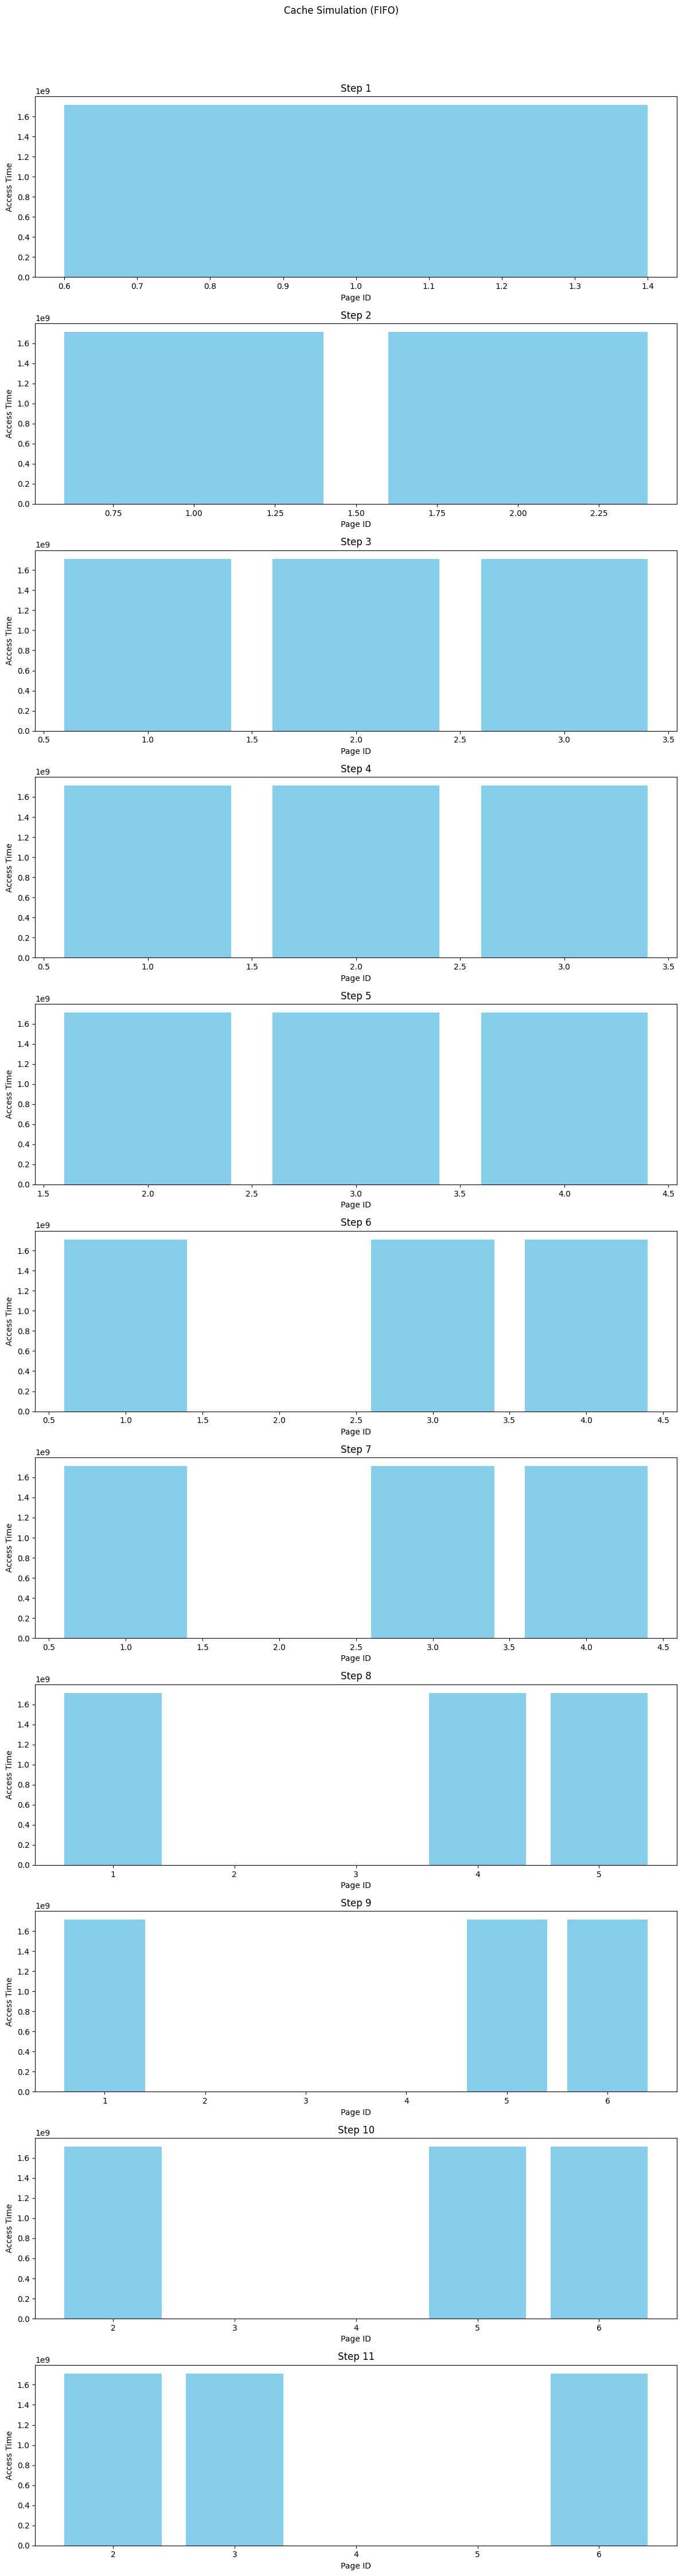

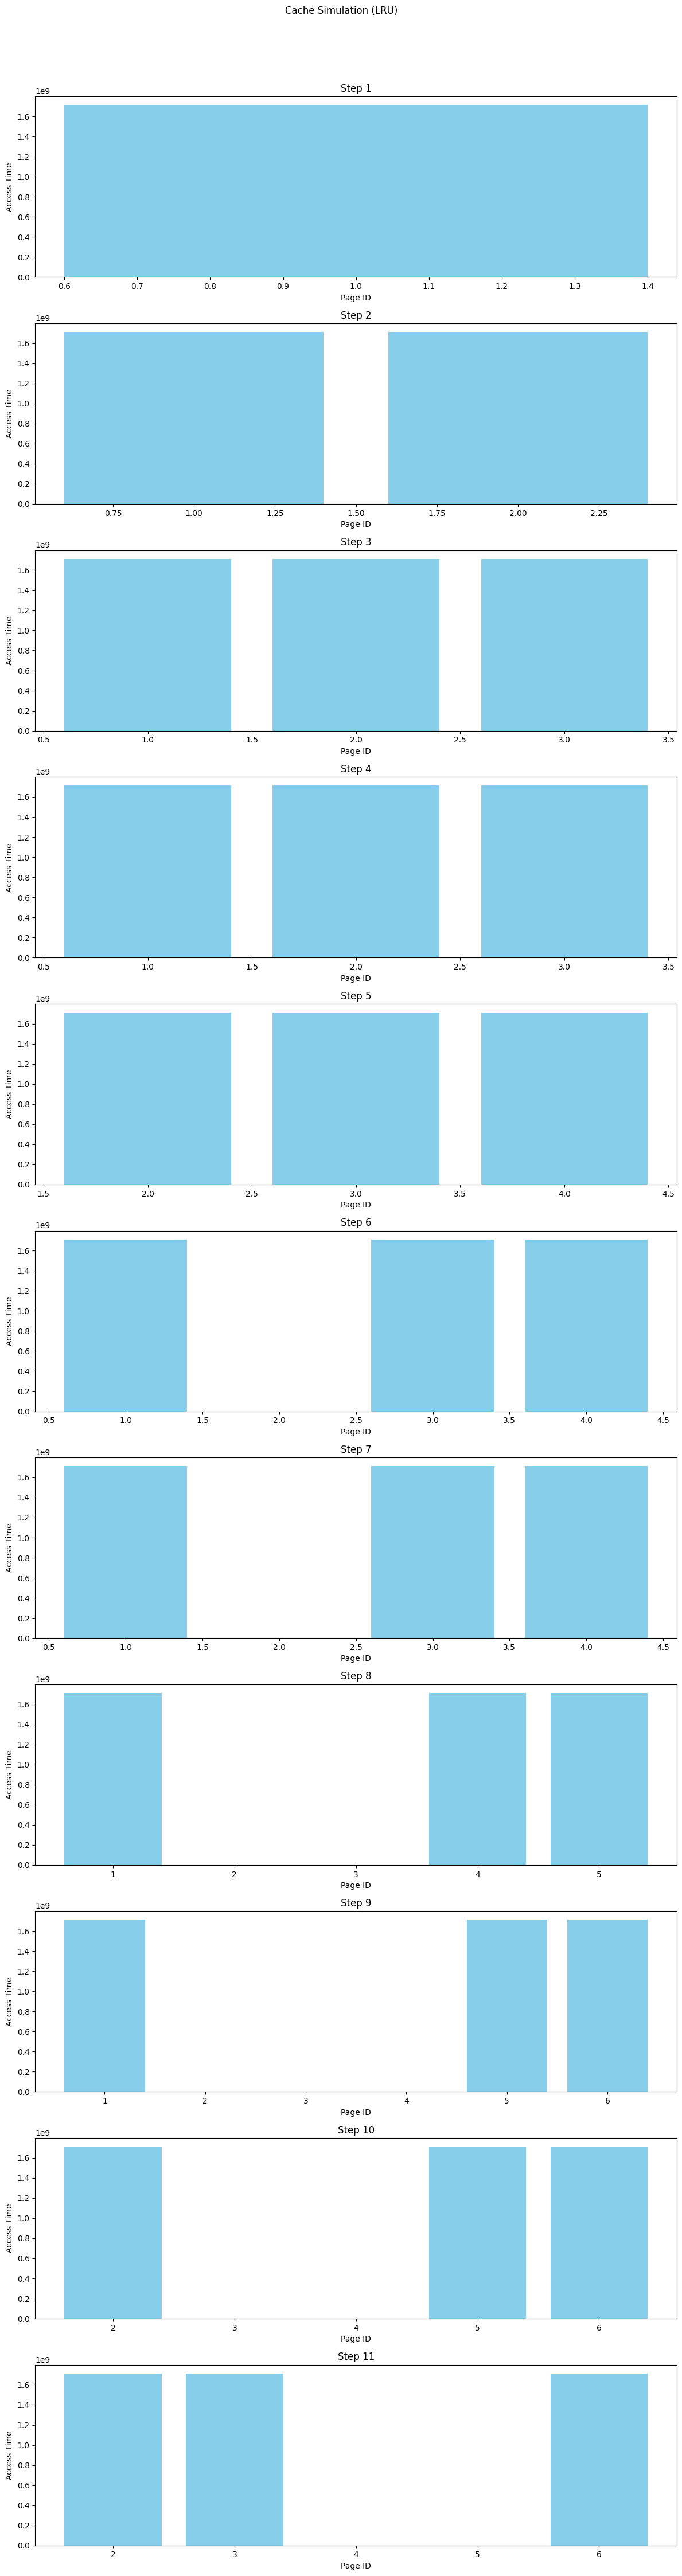

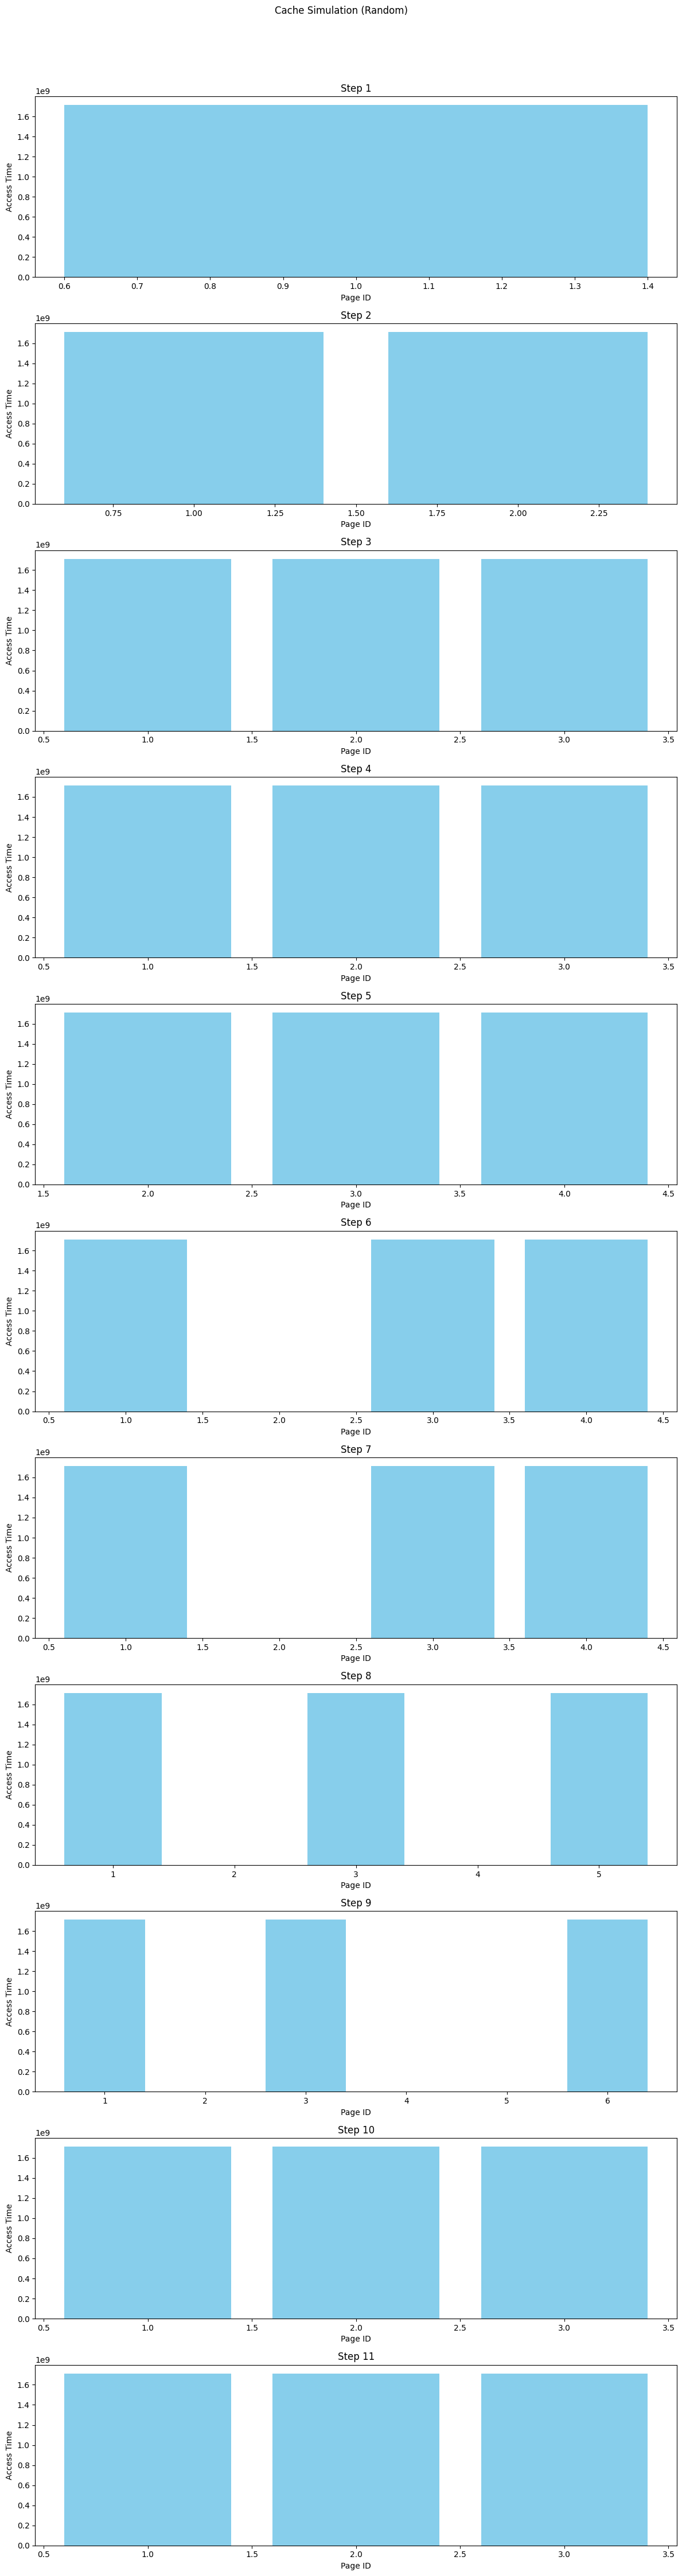

In [3]:
import time
import random
import matplotlib.pyplot as plt
from collections import OrderedDict  # Added import statement

class CacheSimulation:
    def __init__(self, capacity, replacement_strategy):
        self.capacity = capacity
        self.cache = OrderedDict()
        self.replacement_strategy = replacement_strategy
        self.cache_history = []

    def access_page(self, page_id):
        if page_id in self.cache:
            # Page is already in the cache, update its access time
            self.cache[page_id] = time.time()
        else:
            if len(self.cache) >= self.capacity:
                # Cache is full, perform replacement based on the chosen strategy
                self.perform_replacement(page_id)
            else:
                # Add the new page to the cache
                self.cache[page_id] = time.time()

        self.cache_history.append(dict(self.cache))

    def perform_replacement(self, new_page):
        if self.replacement_strategy == 'FIFO':
            # FIFO: Remove the oldest page
            removed_page = next(iter(self.cache))
            del self.cache[removed_page]

        elif self.replacement_strategy == 'LRU':
            # LRU: Remove the least recently used page
            removed_page = min(self.cache, key=self.cache.get)
            del self.cache[removed_page]

        elif self.replacement_strategy == 'Random':
            # Random: Remove a randomly chosen page
            removed_page = random.choice(list(self.cache.keys()))
            del self.cache[removed_page]

        # Add the new page to the cache
        self.cache[new_page] = time.time()

    def plot_cache_history(self):
        num_steps = len(self.cache_history)

        plt.figure(figsize=(12, 4 * num_steps))

        for i, cache_state in enumerate(self.cache_history):
            plt.subplot(num_steps, 1, i + 1)
            page_ids = list(cache_state.keys())
            access_times = [cache_state[page] for page in page_ids]
            plt.bar(page_ids, access_times, color='skyblue')
            plt.title(f"Step {i + 1}")
            plt.xlabel("Page ID")
            plt.ylabel("Access Time")

        plt.suptitle(f"Cache Simulation ({self.replacement_strategy})", y=1.02)
        plt.tight_layout()
        plt.show()

# Example Usage
cache_size = 3
replacement_strategies = ['FIFO', 'LRU', 'Random']

# Create a cache simulation for each replacement strategy
cache_simulations = {strategy: CacheSimulation(cache_size, strategy) for strategy in replacement_strategies}

# Perform simulation
pages_to_access = [1, 2, 3, 2, 4, 1, 3, 5, 6, 2, 3]
for page in pages_to_access:
    for simulation in cache_simulations.values():
        simulation.access_page(page)

# Plot cache history for each strategy
for strategy, simulation in cache_simulations.items():
    simulation.plot_cache_history()
